# Shortest Path Problem

**Objectives**

- Introduce students to the concept of a shortest path tree
- Show students the inner workings of a combinatorial algorithm
- Demonstrate the usefulness of sensitivity analysis in problem solving

**Reading:** Read Handout 3 on the shortest path problem.

**Brief description:** In this lab, we review some motivation and observations behind Dijkstra's algorithm for shortest path computation, and analyze how sensitive the solution to the shortest path problem is to changes in the input data.

<font color='blue'> <b>Solutions are shown blue.</b> </font> <br>
<font color='red'> <b>Instuctor comments are shown in red.</b> </font>

In [1]:
# Imports -- don't forget to run this cell!
import vinal as vl
import pandas as pd
from IPython.display import Image
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

## Part I: The Shortest Path Problem and Dijkstra's Algorithm

As an Entrepreneurial first-year student, you plan to start a pizza delivery company: Good Pizza, Inc.  You will base Good Pizza out of the kitchen on your floor of Jameson Hall and deliver pizzas via bike.  You want to guarantee delivery anywhere on campus in 15 minutes or less; in order to maximize the amount of your tips, you want to deliver as many pizzas as you can and deliver
them as fast as you can.  As a first-year, however, you're still figuring out your way around campus.  You've quickly realized that, because of pedestrian traffic, lights, obstacles, and  placement of bike stands  it is not always best to take the route that covers the shortest distance.  Instead, you would like to know the
quickest way of getting from the your dorm room to various parts of campus.

To help you in finding the quickest routes, you map the travel time between some of the most-happening locations on campus.  Below is an attached map showing the key points on campus. 

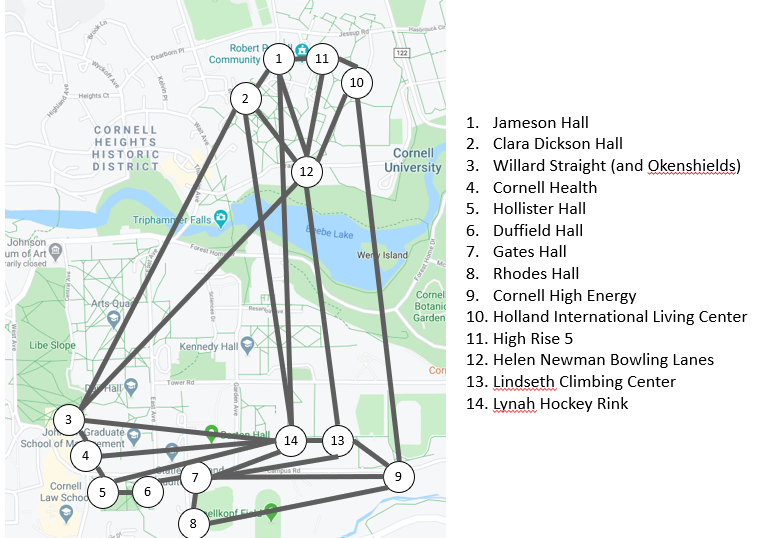

In [2]:
Image("images/campus_map.png", width=500)

Let's load two dataframes with the data for each node and edge of this graph respectively.

In [3]:
nodes = pd.read_csv('data/cornell_pizza_nodes.csv', index_col=0)
display(nodes)
edges = pd.read_csv('data/cornell_pizza_edges.csv', index_col=0)
display(edges.head())

,name,x,y
0,Jameson Hall,127,296
1,Clara Dickson Hall,111,284
2,Willard Straight (and Okenshields),51,50
3,Cornell Health,60,8
4,Hollister Hall,68,-28
5,Duffield Hall,83,-28
6,Gates Hall,95,-16
7,Rhodes Hall,94,-55
8,Cornell High Energy,132,14
9,Holland International Living Center,148,269


,u,v,weight
0,8,9,14
1,2,3,3
2,3,4,3
3,4,5,4
4,5,6,2


Now, let's pass these to `create_network` and create a graph which we can visualize.

In [4]:
G = vl.create_network(nodes, edges)
show(vl.tree_plot(G, tree=[], width=500, height=500, show_cost=False))

**Q:** Your company is based out of Jameson Hall, which is node 1 on the map. What is the index of this node in the graph above? (Hint: Hover over nodes to see their index).

**A:** <font color='blue'> Jameson Hall is node 0. </font> 

**Q:** Let's define our source $s$ to be Jameson Hall.

In [ ]:
# TODO: Uncomment and set s to the index which corresponds to Jameson Hall
# s = XXX

### BEGIN SOLUTION
s = 0
### END SOLUTION

**Q:** What is the node that is closest to Jameson Hall (not considering Jameson Hall itself)? In case of ties, choose any of them. Can there be a quicker route to get to this destination (call it point X) than just to go directly there from Jameson Hall? Why or why not?

**A:** <font color='blue'> 10 (High Rise 5) is closest. There is not a quicker way because every other edge out of 0 is already at least as large. Hence, any other path out of 0 to 10 will have a length at least as large as the direct path. </font> 

**Q:** Explain why the predecessor (“prev$(X)$” from class) of $X$ must be the 0 (Jameson Hall).

**A:** <font color='blue'> By the logic in **Q3**, the shortest path between 0 and 10 is (0,10). Since 0 is the source, this means that we will define prev(10) = 0.</font>

Run the cell below to generate an interactive plot running Dijkstra's algorithm. If you answered **Q** and **Q2** correctly, the node corresponding to Jameson hall will be red.

After running the cell, click node 0 (in red) and then node 10 (High Rise 5)

In [ ]:
show(vl.assisted_dijkstras_plot(G, s=s, width=500, height=500, show_cost=False))

After clicking those two nodes, you should notice that several things happen:

- Node 0 and 10 turn solid dark blue
- The current shortest path tree is shown by highlighting edges in dark grey
- The table on the bottom updates, and you can see the current version of the Dijkstra table 
- In the current table, node 10 is now starred and prev(10) is marked as node 0

**Q:** The graph shows three styles of nodes (solid dark blue, red, and light blue). What does each style of node represent?

**A:** <font color='blue'> Solid dark blue nodes are starred (settled), red nodes are neighbors of starred nodes (frontier), and light blue nodes are the reamining unexplored ones (far away).</font>

How do we find the next edge to add to the tree (i.e., the next edge to “darken”)? One way is as follows. Compute the travel times for all routes that either go directly from Jameson Hall (0) to a destination or go from Jameson Hall (0) to High Rise 5 (10) and then directly to a destination. Take the shortest of all these routes and add it to the tree. For instance, in this case, we consider the following routes. Node IDs are in parenthesis.


| Route | Travel Time |
|-------|-------------|
|Jameson Hall (0) - High Rise 5 (10) | **2**
|Jameson Hall (0) - Clara Dickson Hall (1) | 2*
|Jameson Hall (0) - Helen Newman (11) | 3
|Jameson Hall (0) - Lynah Hockey Rink (13) | 17
|Jameson Hall (0) - High Rise 5 (10) - Holland International Living Center (9) | 3
|Jameson Hall (0) - High Rise 5 (10) - Helen Newman (11) | 7

**Q:** Consider all of the nodes we can reach by these paths (0, 10, 1, 11, 13, and 9). What is true about those nodes (and only those nodes) in the current iteration of Dijkstra's.

**A:** <font color='blue'> They are all dark blue or red and have a finite distance to the source node in the table. </font>

**Q:** There are two paths to node 11 listed above. Look at node 11 in the table. Which of those two paths is indicated in the table? Using just the table – without referring back to the original graph or edge lengths – how can you identify this path?

**A:** <font color='blue'> The path (0,11) is indicated in the table because prev(11) is 0. If prev(11) = 10 and prev(10) = 0, it would have indicated the other path.</font>

Now back to Dijkstra and we pick Clara Dickson (1). Jameson Hall to Clara Dickson is the shortest route on this list (we’ve marked it with a *). 

**Q:** Can there be a shorter route to Clara Dickson (1) than the one that we just added? Why or why not? Answer this question in as much generality as possible. (Hint: suppose that there were some shorter path that went from Jameson (0) – SOMEWHERE ELSE – Clara Dickson (1). How would the length of the first edge in this path have to compare to the length of the edge directly between Jameson (0) and Clara Dickson (1)?)

**A:** <font color='blue'>No. The first edge in any path of the form source – SOMEWHERE ELSE – Clara Dickson (1) would as great or greater than the one we just added. This is becuase we selected the one for which this distance was the shortest!</font>

Now we update the table for the next iteration: if two entries have the same destination we drop the more expensive one (e.g., we drop the Jameson Hall (0) - High Rise 5 (10) - Helen Newman (11) route, since it takes longer than the direct Jameson Hall (0) - Helen Newman (11) route). Then for each destination that can be reached from Clara Dickson (1), we compute the length of the path using only nodes already marked, with Clara Dickson (1) being the second-to-last node on the path.

**Q:** Fill in the missing entries in the table below. Then, as before, cross out any redundant paths (like the Jameson Hall (0) - High Rise 5 (10) - Helen Newman (11) path which we previously dropped).

**A:**

| Route | Travel Time |
|-------|-------------|
|Jameson Hall (0) - High Rise 5 (10) | **2**
|Jameson Hall (0) - Clara Dickson Hall (1) | 2*
|Jameson Hall (0) - Helen Newman (11) | 3
|Jameson Hall (0) - Lynah Hockey Rink (13) | 17
|Jameson Hall (0) - High Rise 5 (10) - Holland International Living Center (9) | 3
|Jameson Hall (0) - Clara Dickson Hall (1) - ? | ?
|Jameson Hall (0) - Clara Dickson Hall (1) - ? | ?
|Jameson Hall (0) - Clara Dickson Hall (1) - ? | ?

<font color='blue'> 
    
| Route | Travel Time |
|-------|-------------|
|Jameson Hall (0) - High Rise 5 (10) | **2**
|Jameson Hall (0) - Clara Dickson Hall (1) | 2*
|Jameson Hall (0) - Helen Newman (11) | 3
|Jameson Hall (0) - Lynah Hockey Rink (13) | 17 (CROSS OUT)
|Jameson Hall (0) - High Rise 5 (10) - Holland International Living Center (9) | 3
|Jameson Hall (0) - Clara Dickson Hall (1) - Helen Newman (11) | 5 (CROSS OUT)
|Jameson Hall (0) - Clara Dickson Hall (1) - Hockey Rink (13) | 16
|Jameson Hall (0) - Clara Dickson Hall (1) - Willard Straight (2) | 20
</font>


On the graph, click Clara Dickson Hall (2). Use the updated table to verify your work. Notice that we discovered a shorter path to Lynah Hockey Rink through Clara Dickson and we see the highlighted edges change according! 

**Q:** Which node should be clicked next? Call it $X$. What is prev(X) and the shortest path from  Jameson Hall to X?

**A:** <font color='blue'>The next node to be clicked is Holland International Living Center (9), prev(9) = 10, and the shortest path is (0,10),(10,9).</font>

Dijkstra’s Algorithm continues in this manner. In the next step, we compute the travel times to destinations not already marked (i.e. starred/solid dark blue) that are adjacent to the lastly marked node, using routes that involve only already marked nodes as intermediate steps.

**Q:** Do the next iteration of the algorithm by hand based on your previous answer: write down the nodes that get marked and/or have their labels updated in this iteration.

**A:** <font color='blue'> Cornell High Energy (8) is marked and prev(8) = 9 </font>

Finish executing Dijkstra's algorithm by clicking the next node to mark at each step. Feel free to use the instance below to avoid scrolling.

In [ ]:
show(vl.assisted_dijkstras_plot(G, s=s, width=500, height=500, show_cost=False))

**Q:** How can you read out the shortest path from Jameson Hall to other places on campus from the shortest path tree?

**A:** <font color='blue'> Because this is a tree, there is exactly one simple path between any pairs of nodes. For any path between Jameson Hall and another node, this path is a shortest path.</font>

**Q:** What is the shortest path (both the route and length) from Jameson Hall (0) to Rhodes Hall (7)?

**A:** <font color='blue'> (0,10),(10,9),(9,8),(8,7) of length 23.</font>

**Q:** Is the 15 minute guarantee a good one? What about a 30 minute guarantee, assuming some reasonably small fluctuations in the actual travel time due to traffic, etc.

**A:** <font color='blue'> 15 minute guarantee is no good but a 30 minute guarantee would probably be reasonable.</font>

**Q:** Is the shortest path always unique? If yes, why? If no, can you give an example of two nodes in the graph for this lab that have more than one shortest path between them?

**A:** <font color='blue'> No, consider routes (0,11),(11,12),(12,6),(6,7) and (0,10),(10,9),(9,8),(8,7) both of length 23 to Rhodes (7).</font>

## Part II: Sensitivity analysis

The next several questions ask you to analyze how sensitive your output is to the precise data that has been used. This is called “performing sensitivity analysis” for the input.

**Q:** Suppose that there was a parade on campus so that the time to go from Holland International (9) to Cornell High Energy (8) directly was increased to 20 minutes.
Would this change the shortest path tree? How would the shortest path tree change?

**A:** <font color='blue'> Yes, the shortest path to Cornell High Energy is now (0,11),(11,12),(12,8) and the shortest path to Rhodes Hall is now (0,11),(11,12),(12,6),(6,7).</font>

**Q:** Can such an increase affect any of the routes that did not originally include the leg from Holland International (9) to Cornell High Energy (8)? Why or why not?

<font color='blue'> As long as the change is an increase, then no because there is no way this would introduce a shorter path.</font>

Run the cell below to change the weight and generate a plot running Dijkstra's algorithm. Press the next button to see each iteration until all nodes are marked.

In [ ]:
G[9][8]['weight'] = 20  # change weight
show(vl.dijkstras_plot(G, s=s, width=500, height=500, show_cost=False))

**Q:** Did you make any mistakes in **Q16** and **Q17**?

<font color='blue'>Answers will vary.</font>

**Q:** Suppose the travel time from node (9) to node (8) increased from 14 minutes, but not all the way to 20 minutes. By how much could the travel time increase without the shortest path route to node (8) changing?

<font color='blue'>The next shortest path is of length 20: (0,11),(11,12),(12,8) so the travel time could increase to 17 but no further.</font>

Suppose that your competitor, Better-Than-Adequate Pizza, decides to promote their brand by installing a moving walkway that takes students from Clara Dickson on North Campus to the Lynah hockey rink. This has the effect of reducing the travel time from Clara Dickson (1) to Lynah (13) so that it only takes 5 minutes.

**Q:** Would this change or alter the shortest path tree? Does this affect any of the routes that did not originally include the leg from Clara Dickson to Lynah? Why or why not?

<font color='blue'>Yes, it changes it dramatically. It can affect other routes that did not originally include the leg from Clara Dickson to Lynah by making them shorter.</font>

In [ ]:
G[9][8]['weight'] = 14  # change this weight back t original
G[1][13]['weight'] = 5  # change this weight
show(vl.dijkstras_plot(G, s=s, width=500, height=500, show_cost=False))

**Q:** Suppose that all the travel times obeyed the following inequality:

$$\text{(travel time from A to C) ≤ (travel time from A to B) + (travel time from B to C)}$$

for all nodes A, B and C. This is called the triangle inequality. Suppose our input was the complete graph (that is, there is an edge between every pair of nodes). If the travel times on this input obeyed the triangle inequality, what would the shortest path tree look like?

**A:** <font color='blue'>It would contain all and only edges of the form $(s,i)$ for source $s$ and node $i$</font>

<font color='red'>Part III: NYC Data currently implemented in a separate notebook.</font>

<font color='red'>**TODO:** Modeling example through text splitting (past HW question).</font>